# Predicting Stock Profitability with Machine Learning in Python
Currently, there are over three thousands publicly traded stocks on the market, and the average rate of return for Nasdaq stocks is about 6%. 
According to the [Efficient Market Hypothesis](https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp), it is impossible to predict the future value of stocks because stock prices reflect all information. However, using big data analytics, we can gain more insights on the factors that make a stock profitable. This report thus aims to build a model that predicts stock profitability based on past data. 
* **Dataset**: 5 financial dataset containing stock information from 2014 to 2018
* **Problem Statement**: What stocks are favorable for investment?
* **Methodology**: Supervised learning - decision tree classification
* **Goal**: To predict profitable stocks
---

## 0. Environment Setup

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# pd.set_option('display.max_columns', None) # to view all columns in output
# pd.set_option('display.max_rows', None) # to view all rows in output

---
## 1. Exploratory Data Analysis
### 1.1 Data Validation
**Load data**

In [3]:
import glob

path = r'./data'
all_files = glob.glob(path + "/*.csv")

files_list = []

for file, year in zip(all_files, range(2014, 2019)):
    df = pd.read_csv(file, index_col='Unnamed: 0', header=0)
    files_list.append(df)
    print(f"Dimensions of {year} dataset: {df.shape}")

Dimensions of 2014 dataset: (3808, 224)
Dimensions of 2015 dataset: (4120, 224)
Dimensions of 2016 dataset: (4797, 224)
Dimensions of 2017 dataset: (4960, 224)
Dimensions of 2018 dataset: (4392, 224)


Since 2017 dataset has the most samples, we will use this dataset to train our model and test it on the latest (2018) dataset.

In [4]:
df_2017 = files_list[3]

**Overview of the 2017 dataframe** <p>
 
* Each sample represents a stock symbol.
* Each column is an attribute of the stock. 

In [5]:
df_2017.head(5)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2018 PRICE VAR [%],Class
PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.000000e+00,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,1.838900e+10,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,Consumer Defensive,4.975151,1
VIPS,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,3.893281e+08,...,0.9219,0.4764,0.5889,1.5821,0.3805,0.2141,0.1920,Consumer Defensive,-56.320000,0
KR,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.000000e+00,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,2.932000e+09,...,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,Consumer Defensive,-0.990449,0
RAD,2.292754e+10,0.1039,1.786283e+10,5.064707e+09,0.000000e+00,4.776995e+09,4.816124e+09,2.485830e+08,2.000650e+08,4.849100e+07,...,0.1063,-0.3365,0.0281,0.0502,-0.5295,0.0000,0.0427,Consumer Defensive,-66.666666,0
GIS,1.561980e+10,-0.0570,1.005200e+10,5.567800e+09,0.000000e+00,2.888800e+09,3.069200e+09,2.498600e+09,2.951000e+08,2.312700e+09,...,0.0509,0.0494,0.0046,-0.0943,0.1246,0.0000,-0.0738,Consumer Defensive,-31.280412,0


### 1.2 Summary Statistics
Among 224 attributes, we identified the followings key information:
1. `PRICE VAR` and `Class` can be useful to determine whether a stock is favorable or not. <p> 
    * According to [Investopia](https://www.investopedia.com/ask/answers/052215/what-price-variance-cost-accounting.asp), <br> "*Price variance is the actual unit cost of an item less its standard cost, multiplied by the quantity of actual units purchased...a positive price variance means the actual costs have increased over the standard price, and a negative price variance means the actual costs have decreased over the standard price.*" <p> 
2. `Class` equals 1 when `PRICE VAR` is positive; 0 if `PRICE VAR` is negative.
3. Some attributes' data are more complete, such as `Class` and `Sector`; while some are mostly missing, such as `operatingCycle` and `cashConversionCycle`, which only have 5 data points.

In [6]:
df_2017.describe(include='all').round(2).T # round to 2 decimal points and transpose for better view

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Revenue,4435.0,NaN,NaN,NaN,5085608402.15,31483890371.41,-30045000.0,59000000.0,440000000.0,2254111000.0,1695864000000.0
Revenue Growth,4236.0,NaN,NaN,NaN,0.95,18.96,-6.87,0.0,0.07,0.21,825.96
Cost of Revenue,4281.0,NaN,NaN,NaN,3235880594.08,26192883657.799999,-2986887894.74,3945000.0,158816000.0,1170103000.0,1465577000000.0
Gross Profit,4426.0,NaN,NaN,NaN,1934378043.43,7911822137.87,-813823000.0,32000000.0,199376114.87,882376250.0,230287000000.0
R&D Expenses,4173.0,NaN,NaN,NaN,106158955.74,798306463.17,-109800000.0,0.0,0.0,14000000.0,22620000000.0
...,...,...,...,...,...,...,...,...,...,...,...
R&D Expense Growth,4110.0,NaN,NaN,NaN,0.38,13.38,-1.22,0.0,0.0,0.0,837.0
SG&A Expenses Growth,4132.0,NaN,NaN,NaN,0.72,31.83,-2.37,-0.0,0.07,0.18,2042.0
Sector,4960,11,Financial Services,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018 PRICE VAR [%],4960.0,NaN,NaN,NaN,-4.46,561.8,-100.0,-33.39,-13.34,2.12,39220.0


### 1.3 Data Visualization

**(1) Distribution of Stock Class** <p>
Below table and graph displays the distribution of stock class. 

In [7]:
print("Distribution of stock Class:")
df_2017['Class'].value_counts().sort_index()

Distribution of stock Class:


Class
0    3590
1    1370
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

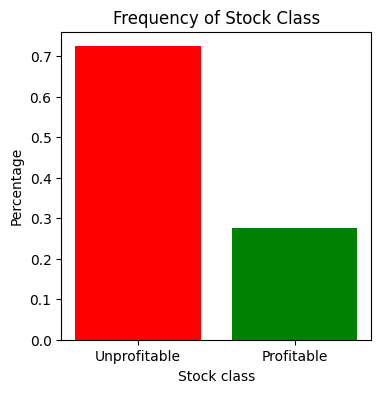

In [8]:
# Bar chart of the percentage of Class 1 and Class 0 stocks
plt.figure(figsize=(4, 4))
class_perc = df_2017['Class'].value_counts().sort_index() / len(df_2017)

plt.bar(range(2), class_perc.values, color=["red", "green"])
plt.title("Frequency of Stock Class")
plt.xticks(range(2), ("Unprofitable", "Profitable"))
plt.xlabel("Stock class")
plt.ylabel("Percentage")

#plt.savefig('/Graph/stock_class_2017.png', dpi=100) # to save the graph
plt.show

Findings:
* 70% of the stocks are not profitable with negative price variance.

**(2) Distribution Stock Class by Sector**<p>
Below table and graph displays the breakdown of stock class by sector.

In [9]:
print("Distribution of stock Class by sector:")
df_2017['Sector'].value_counts()

Distribution of stock Class by sector:


Sector
Financial Services        1247
Healthcare                 718
Technology                 665
Industrials                595
Consumer Cyclical          520
Basic Materials            282
Energy                     266
Real Estate                264
Consumer Defensive         199
Utilities                  110
Communication Services      94
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

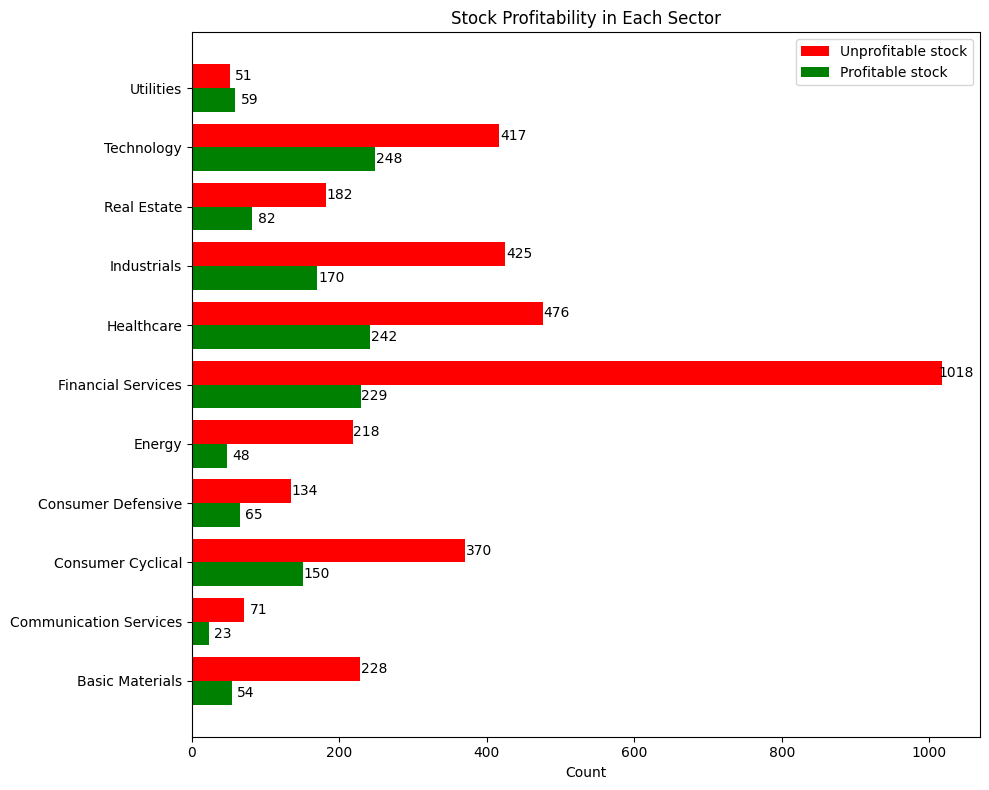

In [10]:
# Bar chart of stock class breakdown by sector
sector_counts_0 = df_2017[df_2017['Class'] == 0]['Sector'].value_counts().sort_index()
sector_counts_1 = df_2017[df_2017['Class'] == 1]['Sector'].value_counts().sort_index()

labels = list(sector_counts_0.keys())

y = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 8))

rects1 = ax.barh(y + width / 2, 
                 sector_counts_0.values, 
                 width, 
                 label='Unprofitable stock', 
                 color="Red")

rects2 = ax.barh(y - width / 2, 
                 sector_counts_1.values, 
                 width, 
                 label='Profitable stock', 
                 color="Green")

ax.set_title("Stock Profitability in Each Sector")
ax.set_xlabel('Count')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10,0),
                    textcoords='offset points',
                    ha='center',
                    va='center')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#fig.savefig('/Graph/final_sector_plot-original.png', dpi=100)
plt.show

Findings:
* Most of the samples are from the fiancial services sector.
* The utilities sector shows a different trend compared to other sectors - more good stocks than bad ones. 

## 2. Data Preprocessing
### 2.1 Data Cleaning

**(1) Drop duplicate columns** <p>
After an initial investigation, we found there are some columns with the same values and some columns with same names. We decided to remove repetitive columns. <p>

* Drop columns with same values: <p>
For columns with same values, we keep the first one in the dataframe.

In [11]:
col_names_old = set(df_2017.columns)
df_2017 = df_2017.T.drop_duplicates().T.infer_objects() # drop columns with same values
col_names_new = set(df_2017.columns)
dup_cols = list(col_names_old - col_names_new)

print("Dropped columns:", *dup_cols, sep="\n")
print(f"Dimension after dropping duplicate columns: {df_2017.shape}")

Dropped columns:
PB ratio
Debt to Assets
cashFlowCoverageRatios
Operating Cash Flow per Share
eBITperRevenue
Days Payables Outstanding
ROIC
PFCF ratio
Days of Inventory on Hand
nIperEBT
Return on Tangible Assets
POCF ratio
Payables Turnover
Inventory Turnover
PTB ratio
ROE
Interest Coverage
Payout Ratio
eBTperEBIT
Free Cash Flow per Share
PE ratio
Debt to Equity
Price to Sales Ratio
Cash per Share
Dimension after dropping duplicate columns: (4960, 200)


* Drop columns with same names <p>
Next, we investigate whether there are columns that have the same names. 
To do so, we transform column names into lowercase and remove whitespaces to check 
whether there are columns with the same names.

In [12]:
col_names_lower_strip = [name.lower().replace(" ","") for name in df_2017.columns]
seen = set()  # to store column names that have been seen
dup_col_names = []  # to store duplicate column names
for name in col_names_lower_strip:
    if name not in seen:
        seen.add(name)
    else:
        dup_col_names.append(name)
print(f"Duplicate column names: {dup_col_names}")

Duplicate column names: ['netprofitmargin', 'currentratio', 'dividendyield']


We identified following columns with same names have repeated entries with different data. <p>
Summary statistics of columns with same names but different values:

In [13]:
dup_cols = ['currentRatio','Current ratio',
            'dividendYield', 'Dividend Yield', 
            'netProfitMargin','Net Profit Margin']
df_2017[dup_cols].describe().round(2) # round to 2 decimal points

,currentRatio,Current ratio,dividendYield,Dividend Yield,netProfitMargin,Net Profit Margin
count,4141.00,3266.00,4074.00,4128.00,4035.00,4299.00
mean,8.00,7.07,0.24,0.02,-9.75,-9.10
std,157.65,152.56,6.61,0.25,387.36,375.29
min,-1.30,-1.30,-0.00,0.00,-24414.00,-24414.00
25%,0.90,1.14,0.00,0.00,-0.03,-0.03
50%,1.73,1.89,-0.00,0.00,0.05,0.04
75%,3.16,3.32,0.02,0.02,0.14,0.14
max,7455.69,7455.69,369.53,14.55,155.34,156.46


Since the number of missing values are different in each of these variables, we choose the one with fewer missing values for completeness. 

In [14]:
dup_cols_drop = ['Current ratio','dividendYield','netProfitMargin']
df_2017.drop(dup_cols_drop, axis=1, inplace=True)

print(f"Dimension after dropping duplicate columns: {df_2017.shape}")

Dimension after dropping duplicate columns: (4960, 197)


**(2) Handle missing values**

In [15]:
print(f"Average number of missing values: {df_2017.isna().sum().mean().round(2)}")

Average number of missing values: 994.36


* Remove columns with over 994 missing values <p>
On average, there are 994 missing values in each column. We decided not to use indicators that have over 994 missing values because they are considered lacking representativeness and completeness.

In [16]:
unrep_cols = [col for col in df_2017.columns if df_2017[col].isna().sum() > 994]
df_2017.drop(unrep_cols, axis=1, inplace=True)

print(f"Dimensions after removing columns with over 994 nulls: {df_2017.shape}")

Dimensions after removing columns with over 994 nulls: (4960, 143)


* Remove rows with missing values<p>
After dropping columns with too many missing values, there is still about 25% of rows with missing values. To maintain the scale of the dataframe, we decide to fill missing values with the average values instead of dropping them. 

In [17]:
num_missing = df_2017.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {num_missing}")
print("Percentage of rows with missing values: {0:0.2f}%".format(num_missing / len(df_2017) * 100))

Number of rows with missing values: 1316
Percentage of rows with missing values: 26.53%


In [18]:
# df_2017 = df_2017.dropna() # to drop rows with nulls
# print(f"Dimensions after removing missing values: {df_2017.shape}")

# fill in missing values with mean value instead
for col in df_2017.columns[df_2017.isnull().any(axis=0)]:
    df_2017[col].fillna(df_2017[col].mean(), inplace=True)
print(f"Dimensions after adjusting missing values: {df_2017.shape}")

Dimensions after adjusting missing values: (4960, 143)


**(3) Drop outliers** <p>
Data points that are outside 99 percentiles or 1 percentiles are omitted because extreme values might skew the results.

In [19]:
# Calculate IQR score
P1 = df_2017.quantile(0.01, numeric_only=True)
P99 = df_2017.quantile(0.99, numeric_only=True)

# Remove outliers outside 1 and 99 percentiles
numeric_cols = df_2017.select_dtypes(include=['number'])
df_2017 = df_2017[~((numeric_cols < P1) | (numeric_cols > P99)).any(axis=1)]

print(f"Dimension after removing outliers dataset: {df_2017.shape}")

Dimension after removing outliers dataset: (2389, 143)


To ensure our data cleaning process does not change the distributions of the outcome variable (Class) and Sectors, we printed out the distributions of these two variables again. 

<function matplotlib.pyplot.show(close=None, block=None)>

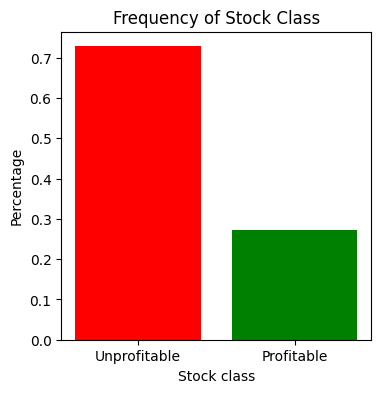

In [20]:
plt.figure(figsize=(4, 4))
class_perc = df_2017['Class'].value_counts().sort_index() / len(df_2017)

plt.bar(range(2), class_perc.values, color=["red", "green"])
plt.title("Frequency of Stock Class")
plt.xticks(range(2), ("Unprofitable", "Profitable"))
plt.xlabel("Stock class")
plt.ylabel("Percentage")

#plt.savefig('/Graph/stock_class_2017.png', dpi=100)
plt.show

As pre-cleaned graph, unprofitable stocks (Class 0) still account for 70% of the data. 

<function matplotlib.pyplot.show(close=None, block=None)>

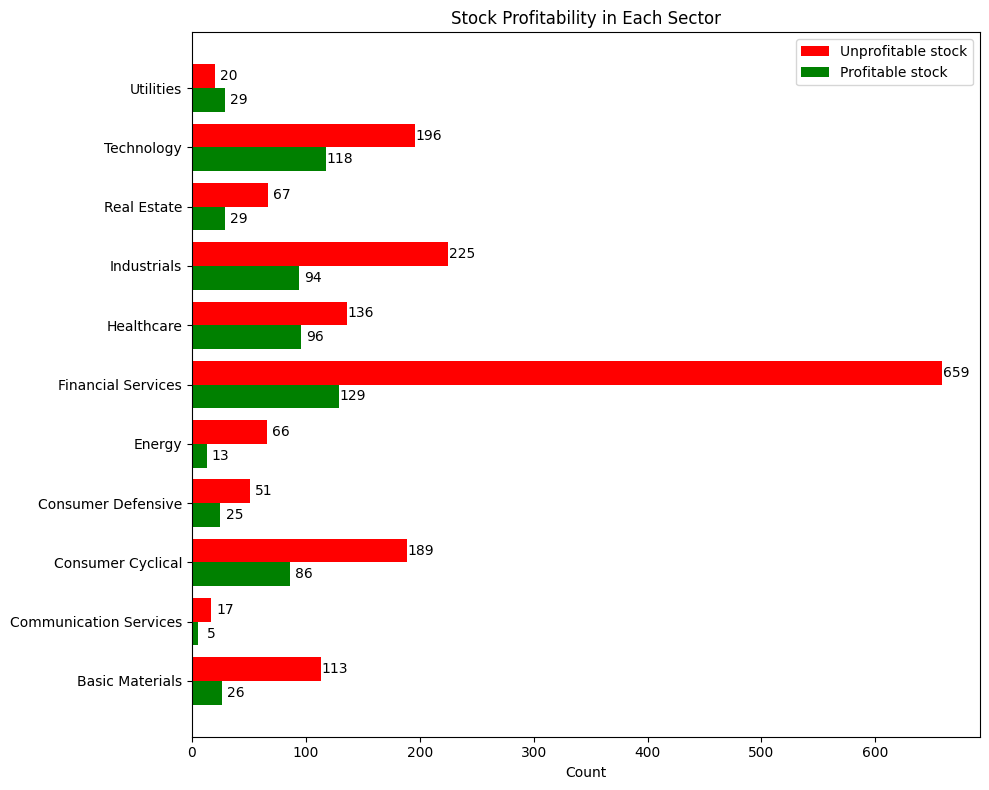

In [21]:
sector_counts_0 = df_2017[df_2017['Class'] == 0]['Sector'].value_counts().sort_index()
sector_counts_1 = df_2017[df_2017['Class'] == 1]['Sector'].value_counts().sort_index()

labels = list(sector_counts_0.keys())

y = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 8))

rects1 = ax.barh(y + width / 2, 
                 sector_counts_0.values, width, 
                 label='Unprofitable stock', 
                 color="Red")

rects2 = ax.barh(y - width / 2, 
                 sector_counts_1.values, 
                 width, 
                 label='Profitable stock', 
                 color="Green")

ax.set_title("Stock Profitability in Each Sector")
ax.set_xlabel('Count')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, 0),
                    textcoords='offset points',
                    ha='center',
                    va='center')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#fig.savefig('/Graph/final_sector_plot-original.png', dpi=100)
plt.show

### 2.2 Feature Engineering

**(1) Feature selection** <p>
We have 141 feature columns. It is hard for modeling for the following reasons.
1. Irrelevant features may have negative impacts on model performance. 
2. Too many parameters can result in overfitting and further reduce model accuracy. 
3. Unnecessary data complicates the algorithm and increases computing time. 

Hence, we select important features based on the `feature_importance_` score by 
scikit-learn Decision Tree Classifier. <p>
For consistency, we will use `random state = 120` for the analysis. 

In [22]:
from sklearn.tree import DecisionTreeClassifier

label = df_2017['Class']
features = df_2017.drop(['2018 PRICE VAR [%]','Class','Sector'], axis=1)
seed = 120

dt_model = DecisionTreeClassifier(random_state=seed, 
                                  class_weight='balanced')
dt_model.fit(features, label)

DecisionTreeClassifier(class_weight='balanced', random_state=120)

In [23]:
print("Top 10 importance features based on the importance score of decision tree classifier:")
pd.Series(dt_model.feature_importances_, 
          index=features.columns).sort_values(ascending=False).head(10)

Top 10 importance features based on the importance score of decision tree classifier:


Investment purchases and sales    0.053858
grossProfitMargin                 0.035661
SG&A to Revenue                   0.032760
Intangibles to Total Assets       0.026348
priceToFreeCashFlowsRatio         0.024347
Other Liabilities                 0.020909
operatingCashFlowSalesRatio       0.020664
Issuance (buybacks) of shares     0.020319
Weighted Average Shares Growth    0.019635
Operating Income Growth           0.019604
dtype: float64

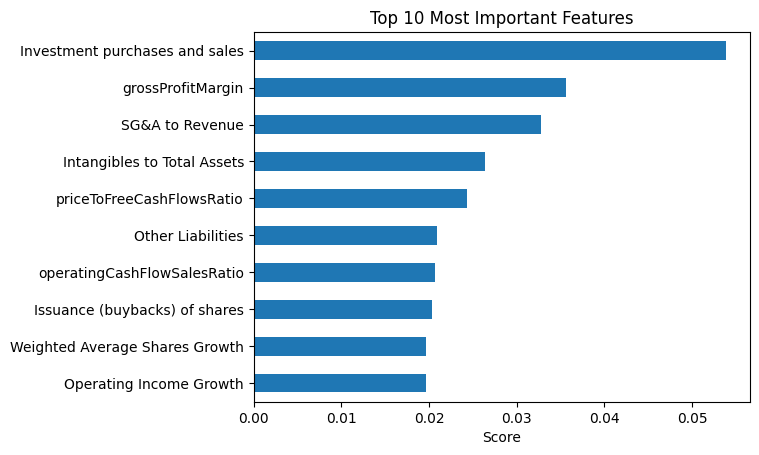

In [24]:
# Bar chart of top 10 important features
plt.figsize=(8, 8)

top10_features = pd.Series(dt_model.feature_importances_, 
                           index=features.columns)

top10_features.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Score")
plt.title("Top 10 Most Important Features")

plt.show()

In the following analysis, we will use the above 10 features along with sectors to perform decision tree learning.

In [25]:
top10_feat_cols = list(top10_features.nlargest(10).index)

**(2) Feature scaling** <p>
* Scale numerical variables: <br> 
We standardize the data with z-transformation so that numerical data can be on the same scale.
We then build a dataframe from scaled numerical columns.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2017[top10_feat_cols])
df_2017_scaled_nums = pd.DataFrame(scaled_features, 
                                   columns=top10_feat_cols, 
                                   index=df_2017.index)

In [27]:
print("Summary statistics of scaled data: ")
df_2017_scaled_nums.describe().loc[['mean','std']]

Summary statistics of scaled data: 


,Investment purchases and sales,grossProfitMargin,SG&A to Revenue,Intangibles to Total Assets,priceToFreeCashFlowsRatio,Other Liabilities,operatingCashFlowSalesRatio,Issuance (buybacks) of shares,Weighted Average Shares Growth,Operating Income Growth
mean,0.000000,-4.758763e-17,2.379381e-17,-1.308660e-16,-1.070722e-16,1.189691e-16,0.000000,-3.271649e-17,7.138144e-17,-1.189691e-17
std,1.000209,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209,1.000209e+00,1.000209e+00,1.000209e+00


The standard deviations of each feature are now around 1.

**(3) Encode categorical variables**

* One-hot encode sector variable

In [28]:
df_2017_encoded_sector = pd.get_dummies(df_2017['Sector'], drop_first=True)
print("Number of sectors:", len(df_2017_encoded_sector.columns))

Number of sectors: 10


Build a dataframe with standardized features, one-hot columns, and the outcome variable

In [29]:
df_2017_final = df_2017_scaled_nums.join(df_2017_encoded_sector)
df_2017_final = df_2017_final.join(df_2017['Class'])

print(f"Dimension of the final dataframe: {df_2017_final.shape}")

Dimension of the final dataframe: (2389, 21)


## 3. Modeling: Classification with Decision Tree Analysis

### 3.1 Formulate the Classification Problem

The problem we want to solve is formulated as follows: 
*"Will it be a profitable stock based on its financial information?"* <p>
Since the target is a categorical variable (binary outcome: Yes or No), 
this is a classification problem. <p>

This is a supervised learning problem. <br>
The explanatory variables (features) are the top 10 important financial indicators and sector variables. <br>
The outcome variable (label) is the stock `Class`.

In [30]:
features, label = df_2017_final.drop('Class',axis=1), df_2017_final['Class']
print(f"Feature columns: \n{features.columns}\n")
print(f"Features: \n{features.head()}\n")
print(f"Labels: \n{label.head()}")

Feature columns: 
Index(['Investment purchases and sales', 'grossProfitMargin',
       'SG&A to Revenue', 'Intangibles to Total Assets',
       'priceToFreeCashFlowsRatio', 'Other Liabilities',
       'operatingCashFlowSalesRatio', 'Issuance (buybacks) of shares',
       'Weighted Average Shares Growth', 'Operating Income Growth',
       'Communication Services', 'Consumer Cyclical', 'Consumer Defensive',
       'Energy', 'Financial Services', 'Healthcare', 'Industrials',
       'Real Estate', 'Technology', 'Utilities'],
      dtype='object')

Features: 
      Investment purchases and sales  grossProfitMargin  SG&A to Revenue  \
GIS                         0.311733          -0.641176        -0.626593   
HRL                         0.272825          -1.184828        -0.671955   
BUFF                        0.272825          -0.058621         1.695711   
MNST                       -1.039963           0.454597        -0.584795   
SJM                         0.394338          -0.534417    

### 3.2 Partition Data

**Split train, validation, and test dataset**<p>
We first split the data into train and test dataset. The proportion of train and test dataset are 80/20. <p>
Then, we use 10% of the train dataset as validation dataset, in order to address overfitting problem and find out the best combination of parameters. The validation dataset will be used to evaluate the model's performance on generalizability. <p>
Before splitting, we set random seed to ensure reproducibility and shuffle our data to prevent the trend of the dataframe from biasing the result.

In [31]:
from sklearn.model_selection import train_test_split

test_size = 0.2
val_size = 0.1

# Split train and test dataset, train dataset contains validation dataset
X_train_val, X_test, y_train_val, y_test = \
    train_test_split(features,
                     label,
                     test_size=test_size,
                     random_state=seed,
                     shuffle=True)

# Split train dataset again into train and validation dataset
X_train, X_val, y_train, y_val = \
    train_test_split(X_train_val, 
                     y_train_val,
                     test_size=val_size, 
                     random_state=seed, 
                     shuffle=True)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")
print(f"Total samples: {len(X_train) + len(X_val) + len(X_test)}")

Training samples: 1719
Validation samples: 192
Test samples: 478
Total samples: 2389


### 3.2 Create & Train Model

For the initial model, we set Gini index and maximum depth of 20 as the criteria of the Decision Tree Model.
Then, we fit the model to the training (including evaluation) data.

In [32]:
from sklearn.tree import DecisionTreeClassifier

seed = 120
dt_model_initial = DecisionTreeClassifier(criterion='gini',
                                  random_state=seed,
                                  max_depth=20,
                                  min_samples_split=2,
                                  class_weight='balanced')
dt_model_initial.fit(X_train_val, y_train_val)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=120)

### 3.3 Evaluate Model

In [33]:
print("Train accuracy: {0:0.2f}".format(dt_model_initial.score(X_train_val, y_train_val)))
print("Test accuracy: {0:0.2f}".format(dt_model_initial.score(X_test, y_test)))

Train accuracy: 0.95
Test accuracy: 0.67


We achieve 95% on the train accuracy, so the initial model is good. 
However, the test accuracy is only 67%. 
It implies the model's generalization performance is low. 
There might be overfitting problem.

## 4. Refine Model with Hyperparameter Tuning

### 4.1 Cross Validation
**Estimate model's generalization performance**<p>
Overfitting occurs when the model has high accuracy on original data but returns low accuary on other data. Overfitting results in poor prediction. Hence, to ensure our model is not overfitting, we find the maximum depth that generates best accuracy for both train and validation dataset.

In [52]:
max_depth_options = list(range(1, 9))

train_accuracy = []
val_accuracy = []

for i in max_depth_options:
    dt_model_cv = DecisionTreeClassifier(criterion='gini', 
                                      max_depth=i,
                                      class_weight='balanced', 
                                      random_state=seed)
    dt_model_cv.fit(X_train,y_train)
    train_acc = dt_model_cv.score(X_train, y_train)
    val_acc = dt_model_cv.score(X_val, y_val)
    print("Max depth: {0:1.0f} \
          Train accuracy: {1:0.2f} \
          Validation accuracy: {2:0.2f}".format(i, train_acc, val_acc))
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

Max depth: 1           Train accuracy: 0.48           Validation accuracy: 0.47
Max depth: 2           Train accuracy: 0.59           Validation accuracy: 0.58
Max depth: 3           Train accuracy: 0.58           Validation accuracy: 0.57
Max depth: 4           Train accuracy: 0.64           Validation accuracy: 0.60
Max depth: 5           Train accuracy: 0.65           Validation accuracy: 0.61
Max depth: 6           Train accuracy: 0.69           Validation accuracy: 0.61


Max depth: 7           Train accuracy: 0.73           Validation accuracy: 0.60
Max depth: 8           Train accuracy: 0.79           Validation accuracy: 0.59


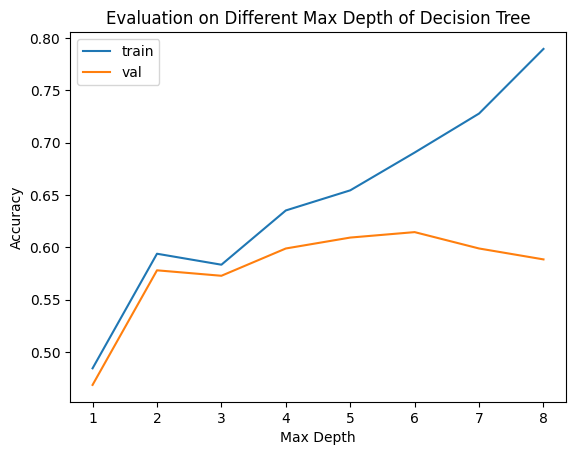

In [53]:
# Plot train and validation curve with regards to different max depth options.
plt.plot(max_depth_options, train_accuracy, label='train')
plt.plot(max_depth_options, val_accuracy, label='val')
plt.title("Evaluation on Different Max Depth of Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

From the above graph, we can see that the accuracy of train dataset increases as the depth of the tree increases, while the accuracy of validation dataset starts falling below its highest number (61%) once tree depth goes over 6. This means the ability of generalization decreases when the tree splits more than 6 times. Therefore, in the following analysis, we will test different combinations of parameters with maximum depth of 6.

### 4.2 Hyperparameter Tuning
We implement a 5-fold Grid Search Cross Validation to idenify the best combination of different parameters. In the parameter grid, we input a range of maximum depth from 1 to 6, a range of minimum samples split from 2 to 10. In addition, we also tests the function to evaluate the quality of the split - gini (impurity) and entropy (information gain). Lastly, we set the class weight to balanced to account for the effect of different proportion of each class value.

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth'        : list(range(1, 7)),
    'criterion'        : ['gini','entropy'],
    'min_samples_split': list(range(2, 10)),
    'class_weight'     : ['balanced']
}

dt_model = DecisionTreeClassifier(random_state=seed)
dt_model_tuned = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1) # n_jobs=-1 to use all processors
dt_model_tuned.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=120),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

**Estimate of generalization performance**

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model_tuned,
                         X_train_val,
                         y_train_val,
                         cv=5)

print("Cross validation scores with different number of folds:")
for i, score in enumerate(scores):
    print(f"{i + 1} fold: {score.round(2)}")

Cross validation scores with different number of folds:
1 fold: 0.55
2 fold: 0.53
3 fold: 0.61
4 fold: 0.53
5 fold: 0.6


The third fold of cross validation returns the best score, therefore, we save the model with best combination of parameters to `dt_model_best`.

In [56]:
dt_model_best = dt_model_tuned.best_estimator_
print("Best estimator:", dt_model_tuned.best_params_)
print("Train accuracy: {0:0.2f}".format(dt_model_best.score(X_train_val, y_train_val)))
print("Test accuracy: {0:0.2f}".format(dt_model_best.score(X_test, y_test)))

Best estimator: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Train accuracy: 0.57
Test accuracy: 0.57


After the enhancement, the train accuracy decreased yet became same as the test accuracy, implying the generalization performance is improved.

## 5. Evaluation of Refined Model


In [57]:
from sklearn.metrics import classification_report

preds = dt_model_best.predict(X_test) # apply fitted model to test data
print("Classification report of refined model:\n")
print(classification_report(y_test, preds))

Classification report of refined model:

              precision    recall  f1-score   support

           0       0.87      0.49      0.63       351
           1       0.36      0.80      0.50       127

    accuracy                           0.57       478
   macro avg       0.62      0.64      0.56       478
weighted avg       0.73      0.57      0.59       478



In [58]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n")
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = cm.ravel()
# Visualize the confusion matrix as a dataframe
df_cm = pd.DataFrame(cm, 
                     index=["Label: Class=0", "Label: Class=1"], 
                     columns=["Prediction: Class=0", "Prediction: Class=1"])
print(df_cm)
print("\nThe confusion matrix provides more details on the accuracy of the model:")
print(f"True Negative: {tn}, False Positive: {fp}, False Negative: {fn}, True Positive: {tp}")

Confusion matrix:

                Prediction: Class=0  Prediction: Class=1
Label: Class=0                  173                  178
Label: Class=1                   26                  101

The confusion matrix provides more details on the accuracy of the model:
True Negative: 173, False Positive: 178, False Negative: 26, True Positive: 101


ROC AUC Score: 0.6441



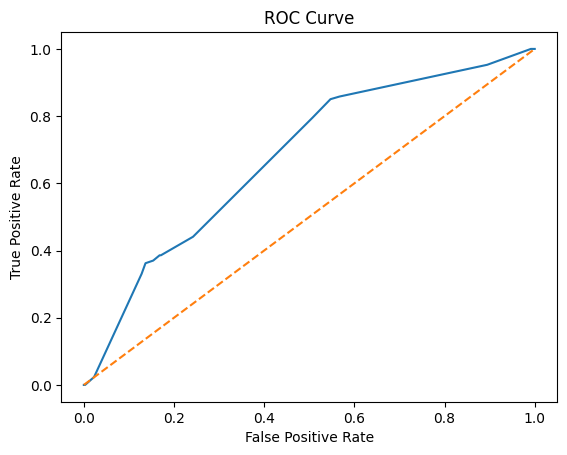

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = dt_model_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_score = roc_auc_score(y_test, preds)
print("ROC AUC Score: {0:0.4}\n".format(roc_score))
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

A score of 0.6441 for the Receiver Operating Characteristic Area Under the Curve (AUC-ROC) indicates the model is better than random guessing, suggesting that the model has some ability to separate the classes, but it may not be very strong.

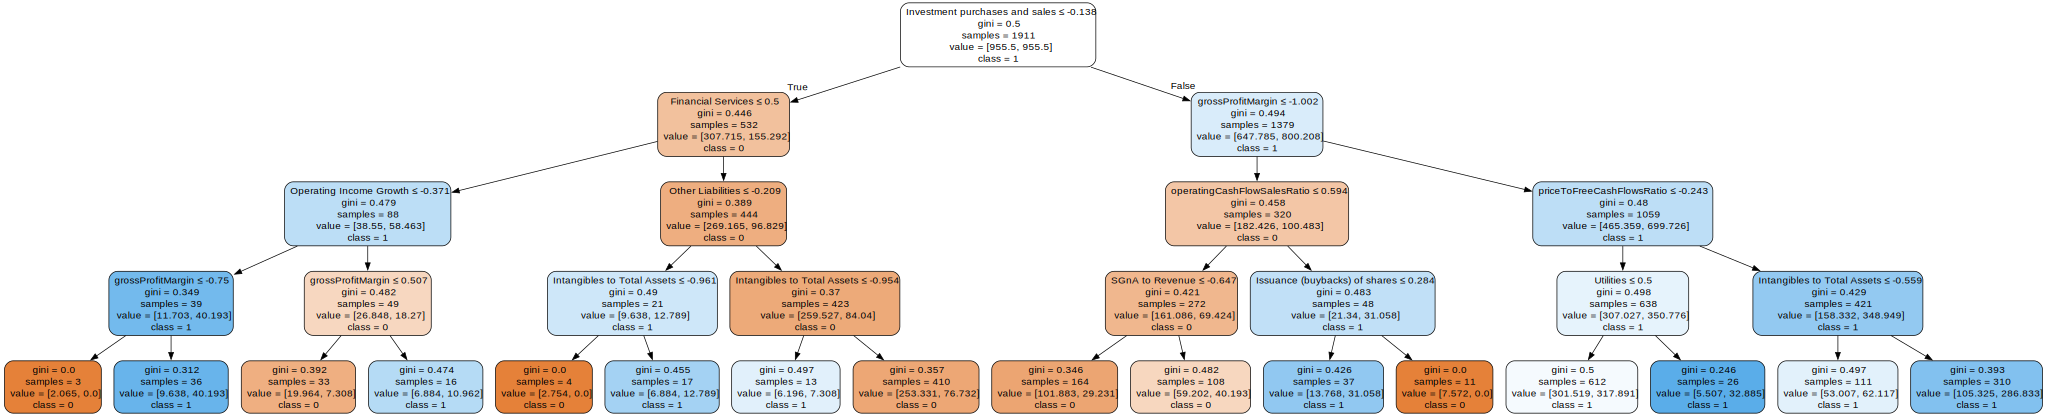

In [60]:
import graphviz 
from sklearn import tree
import os

feature_names = list(X_test.columns)
feature_names[feature_names.index('SG&A to Revenue')] = 'SGnA to Revenue' # tree plot cannot print symbols
class_names = ['0', '1']
dot_data = tree.export_graphviz(dt_model_best, 
                                out_file=None,
                                feature_names=feature_names,
                                class_names=class_names, 
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

The above tree graph illustrates the decision making process at each step of the decision tree classification model.

## 6. Challenges and Solutions

This report performed an analysis of stock profitability prediction. It built two models using decision tree classification. The first model attempts to use all features and achieved high train accuracy and low test accuracy. To improve the model's generalization performance, the second model is built upon the results from cross validation and hyperparameter tuning. The second model's train accuracy is lower than the first model, but is consistent with the test accuracy. Further, the AUC-ROC score indicates the model's ability in telling the result is better than random guess. 

To improve the accuracy of the model, we could consider several aspects. First, we could review the data preprocessing methods. We could adjust our strategy on dealing with missing values and outliers to improve the completeness and quality of the data. Second, we could revisit our feature selection method and hyperparameters tuning process to test different combination of inputs. Lastly, we could also consider alternative models such as logistic regression analysis or random forest classification, depending on the usage of the analysis. Logistic regression assumes linear relations between features and the log-odds of the outcome. Random forest might produce better prediction but the outcome will be less readible.

(The end.)